In [49]:
# lets start with importing necessary library
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix ,roc_auc_score,roc_curve,r2_score
import statsmodels as sm
import matplotlib.pyplot as plt    
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the file and see the column  so 1. it observe top 5 country have socre more than 7
df=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.describe()  #our target variable is happines score so focus should be there

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


so count is ok, happines rank have no role in our model contibution so drop it if i use OHE for country then data dimension will increase  and region can use but at the moment drop now and build the model later on we i wll addif required region .

In [5]:
Happy=df.drop(columns=['Happiness Rank','Country','Region'] ,axis=1)
Happy.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
Happy.info()  #so no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


  lets vizulaise independent and dependednt variable how they have relation 

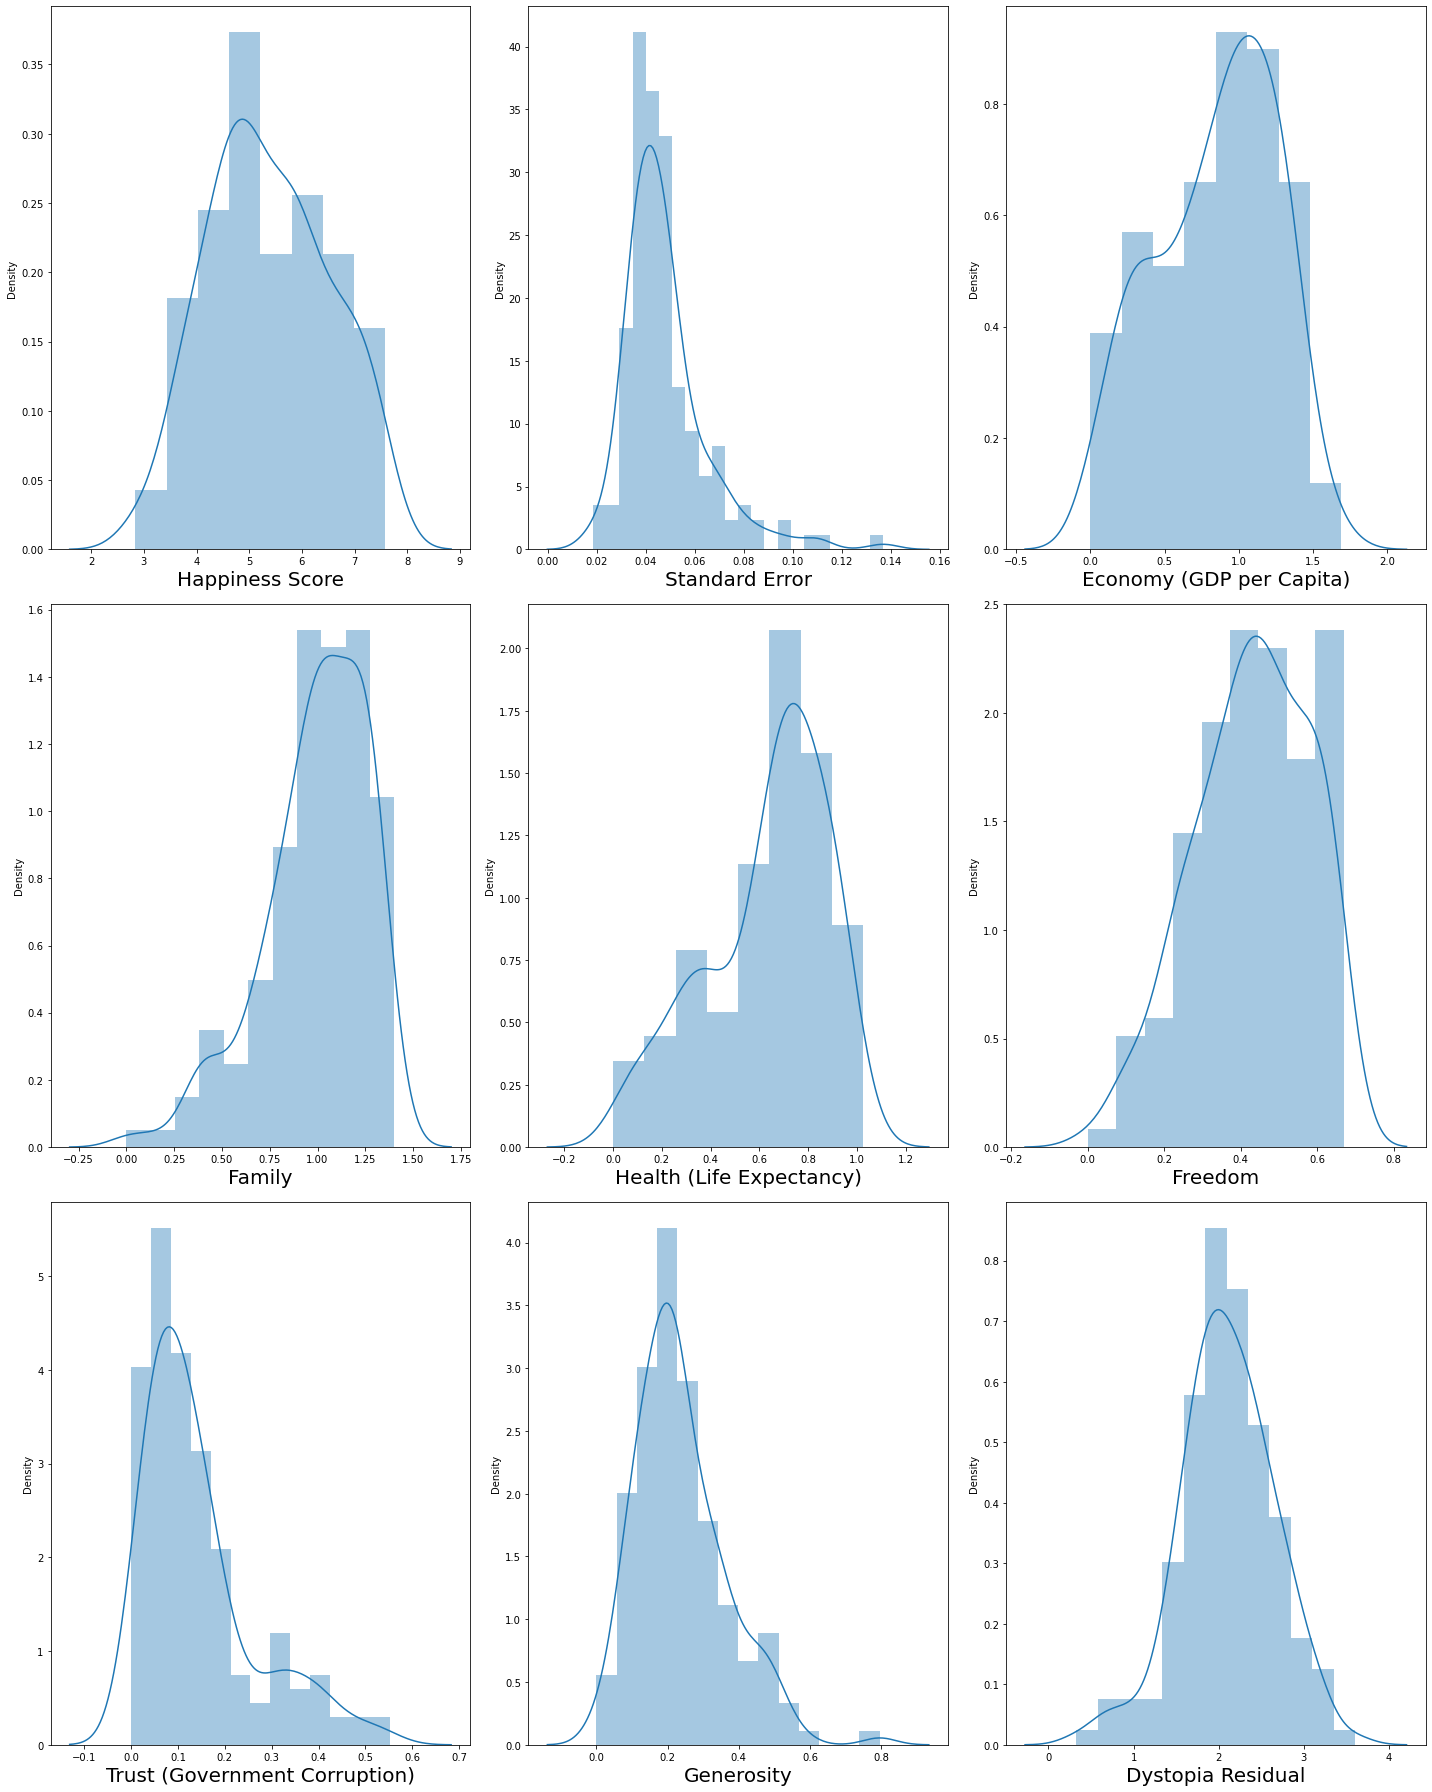

In [7]:
# lets see how data is distributed for every columns 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in Happy:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(Happy[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1     
plt.tight_layout()  

standard Error and Generosity column little bit skewd but lets remove only stndard error not Generosity becuase it have role in model

In [8]:
q=Happy['Standard Error'].quantile(0.96)   #use basic quantile method to remove outlier
data_cleaned=Happy[Happy['Standard Error']<q]

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

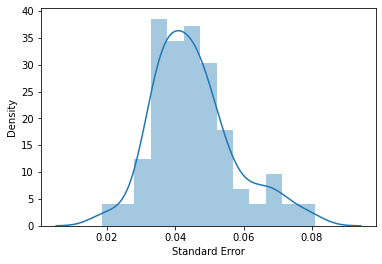

In [9]:
sns.distplot(data_cleaned['Standard Error'])   # now check data distribution

now standard Erroor distribution seems uniform

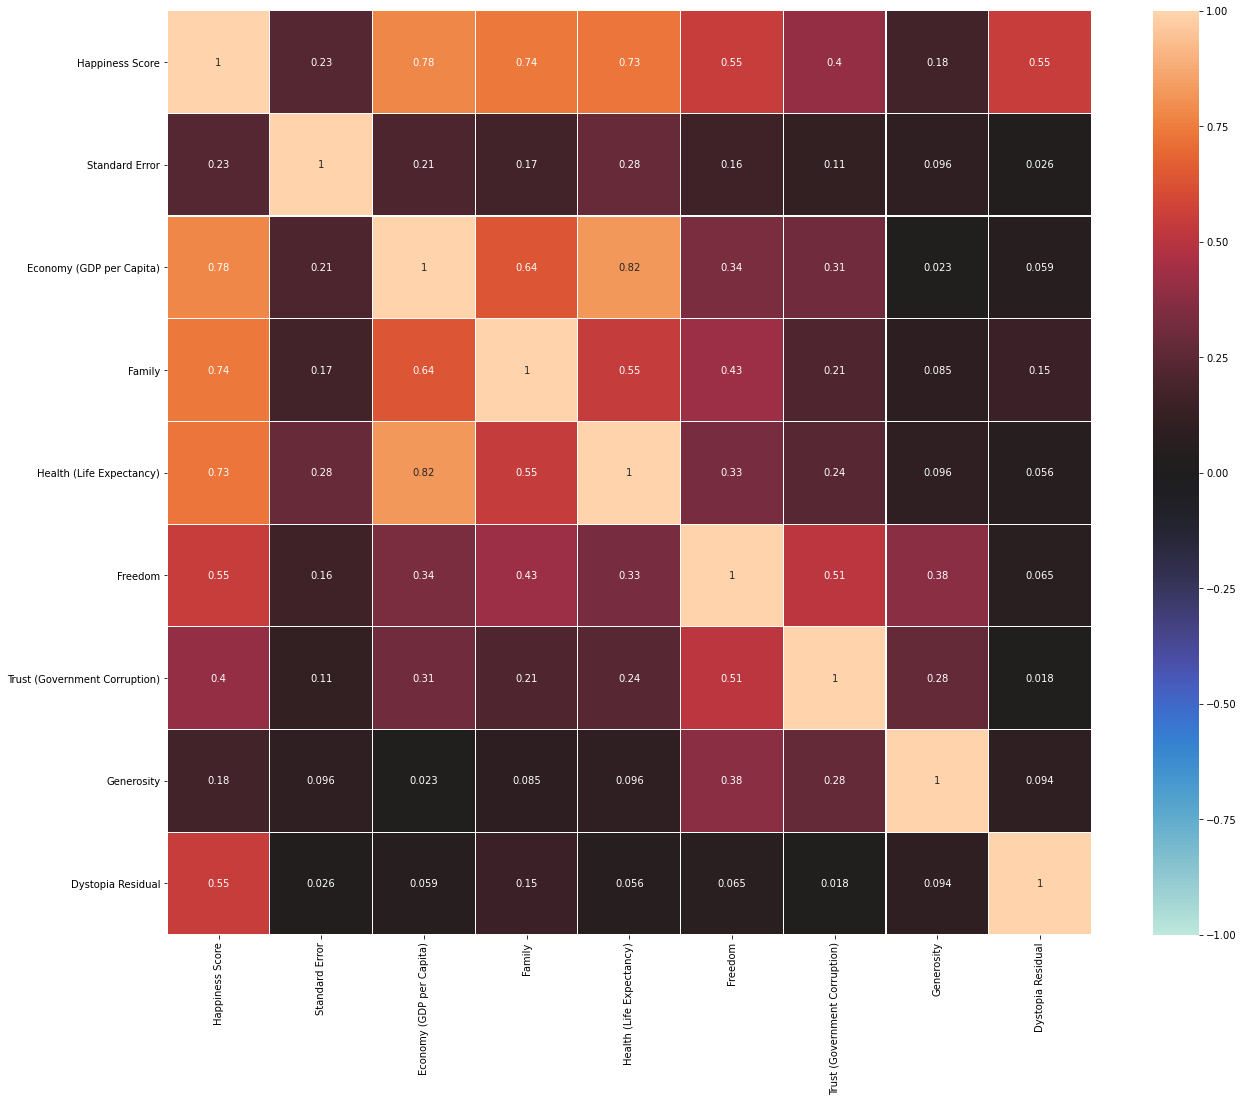

In [10]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=data_cleaned.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

so there is no multicollinearity problem

In [11]:
#divide data into features and label
y=data_cleaned['Happiness Score']
x=data_cleaned.drop(['Happiness Score'],axis=1)

In [12]:
x # print features column data

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [13]:
y  #target variable column

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
152    3.575
153    3.465
154    3.340
155    3.006
157    2.839
Name: Happiness Score, Length: 151, dtype: float64

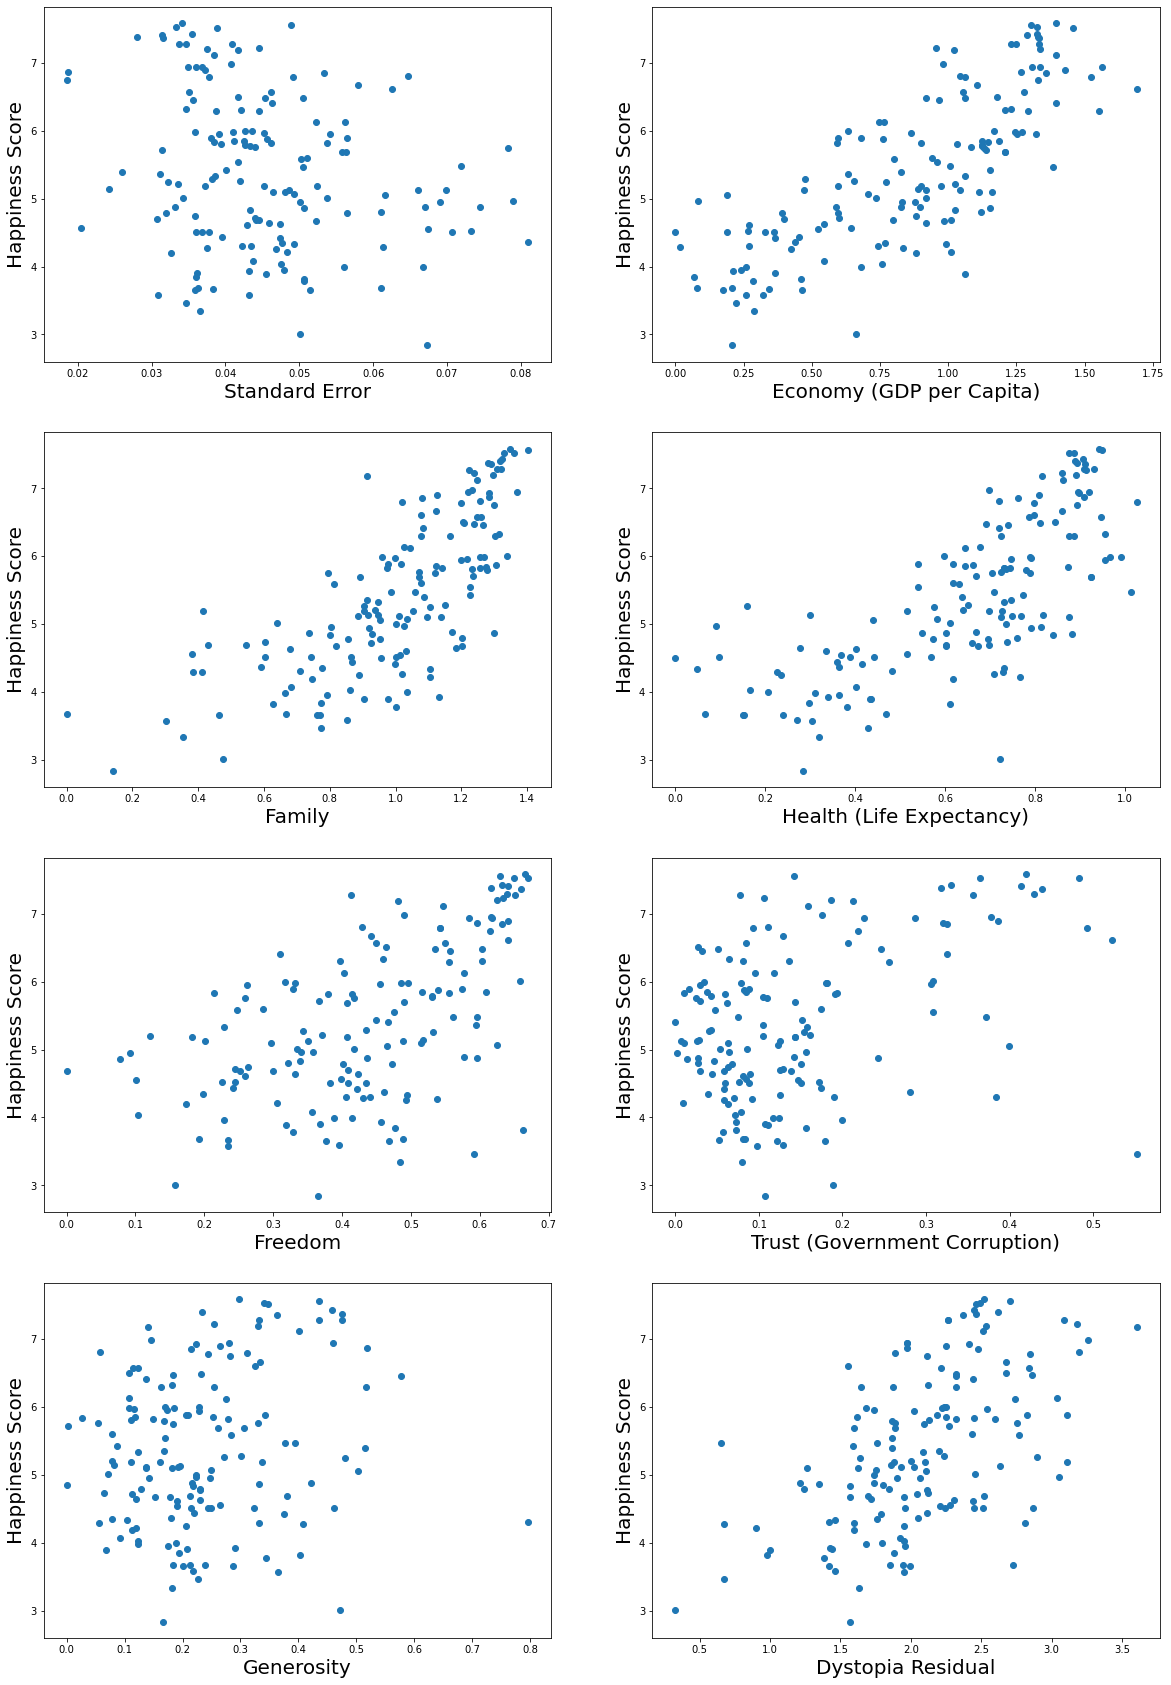

In [14]:
#visulazing relationship between features and label
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column ,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
        plotnumber+=1
plt.show() 

#observation
1.GDP per capita income,  family ,Freedom, health (life expectancy) column are very strong linear relation with happiness score

In [15]:
#Data scaling formulae Z=(x-mean/std)
#lets scale the data
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [16]:
x_scaled  #ok so data is scaled now lets move to train the model

array([[-0.93233845,  1.35724553,  1.30847431, ...,  2.25778713,
         0.45359702,  0.78618135],
       [ 0.29317918,  1.12002638,  1.50202745, ..., -0.04450339,
         1.538403  ,  1.11947705],
       [-1.00139341,  1.17835524,  1.34911606, ...,  2.78544534,
         0.80045191,  0.74043736],
       ...,
       [-0.7285015 , -1.43795617, -2.34689734, ..., -0.55197841,
        -0.43418356, -0.80980376],
       [ 0.40216955, -0.48960845, -1.90255482, ...,  0.34931708,
         1.81434741, -3.16505969],
       [ 1.82653219, -1.63432497, -3.1322341 , ..., -0.32690269,
        -0.5569551 , -0.92898365]])

In [17]:
#split data in train and test,and build the model
x_train , x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=300)

In [18]:
y_train.head() #lets see train data

41     6.130
29     6.574
141    3.904
51     5.889
87     5.102
Name: Happiness Score, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(x_train,y_train)  #model is ready .fit behind the scene will act like gradient descet 

LinearRegression()

In [20]:
Happy.head(2)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [21]:
#lets check our our model is how much accurate
print('Happiness Score:' ,lm.predict(scaler.transform([[.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738]])))

Happiness Score: [7.58690282]


In [22]:
#adjusted R2 score
lm.score(x_train,y_train)     #model score is to high we need to check overfitting further

0.9999999438697404

In [23]:
#lets predict and visulize data
y_pred=lm.predict(x_test)

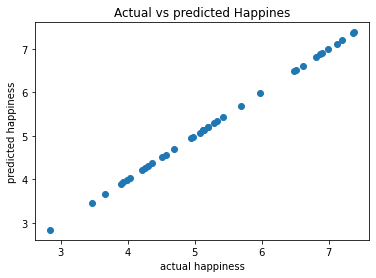

In [24]:
#lets visalize thru graph actual vs predict
plt.scatter(y_test,y_pred)
plt.xlabel('actual happiness')
plt.ylabel('predicted happiness')
plt.title('Actual vs predicted Happines')
plt.show()

as per plot model seems very accurate actual vs prediction is preety close, lets lets check overfitting of model

In [27]:
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV 

In [28]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [29]:
alpha=lassocv.alpha_
alpha

8.196369794027158e-05

In [30]:
#now with Lasso regression lets see how our data is fitted 
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=8.196369794027158e-05)

In [31]:
lasso_reg.score(x_train,y_train)

0.9999999244315491

# Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid_param= {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [34]:
grid=GridSearchCV(lm,param_grid=grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [35]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [36]:
lm=LinearRegression(copy_X= True, fit_intercept= True, normalize=True)

In [37]:
lm.fit(x_train,y_train)

LinearRegression(normalize=True)

In [38]:
predict=lm.predict(x_train)

In [39]:
#adjusted R2 score ,check now r2 score after hyperparamter tuning
lm.score(x_train,y_train) 

0.9999999438697404

In [40]:
#2.lets use decesion tree to build model
from sklearn.tree import DecisionTreeRegressor

In [41]:
#lets visulalize the tree and data without any pre processing 
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [46]:
dt.score(x_train,y_train)

1.0

In [47]:
y_pred=dt.predict(x_test)

In [50]:
#accuracy of our regression tress r2 score
r2_score(y_pred,y_test)

0.7872804084251156

In [44]:
#so now lets build model with KNN
from sklearn.neighbors import KNeighborsRegressor

In [45]:
knn=KNeighborsRegressor()

In [51]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [52]:
#lets check the score of KNN regression model
r2_score(y_pred,y_test)

0.8855211875545718

In [53]:
#lets check with ensamble  random forest regression 
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfr=RandomForestRegressor(n_estimators=6,random_state=1)

In [58]:
rf=rfr.fit(x_train,y_train)
rf

RandomForestRegressor(n_estimators=6, random_state=1)

In [61]:
#so lets check r2_score
y_pred=rf.predict(x_test)
r2_score(y_pred,y_test)

0.7883616838276756

so over all linear regression model have best score .99 highest among all and we can use it 